# Tensorflow - Models training process - Fourth Exercise (25 minutes)
@author Tomasz Skrzypczyk

# Data import

In [1]:
# do not modify this cell
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
columns = data.feature_names

X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model definition

In [2]:
# do not modify this cell
model = tf.keras.Sequential([tf.keras.layers.Dense(3, input_shape=(4,))])
# 3 neurony
# 4 cechy/parametry

# Model compiling

What you have to do first is to **compile** your model. This is different than what you are used to using sklearn or even using other DeepLearning libraries.


The training procedure is as follows:
* define your model
* compile it
* train using fit method


```
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
```

At this step you should at least pass the *loss* parameter. The loss function of your model. This could be 'mse' in case of a regression model or 'categorical_crossentropy' in case of the classification.

What you want to pass next is the *optimizer*. Setting the optimizer to 'adam' or using the default 'rmsprop' are frequent choices. You will learn about different optimizers later on.

The last important parameter to define are the *metrics*. You should always pass a list of metric's objects or strings. Ex. `metrics=["accuracy"]` or `metrics = ["mae"]`.





In [3]:
# compile your model, remember that this is a classification model
# define the 'adam' optimizer, use accuracy as a metric and set the loss to 'sparse_categorical_crossentropy'
model.compile(optimizer="adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")


# Model training

fit method

```
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

```

You really don't need to care about all the parameters!!

Tip: pass your validation data as a tuple (X,y) !!!

In [4]:
# run you training, pass the training data, training labels, validation data, set batch size to 32 and epochs to 100
history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 154ms/step - loss: 4.3441 - accuracy: 0.6281 - val_loss: 6.0743 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 29ms/step - loss: 4.3345 - accuracy: 0.6281 - val_loss: 6.0648 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 4.2575 - accuracy: 0.6281 - val_loss: 6.0558 - val_accuracy: 0.4286
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 4.2247 - accuracy: 0.6281 - val_loss: 6.0481 - val_accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 4.2145 - accuracy: 0.6281 - val_loss: 6.0411 - val_accuracy: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 4.2065 - accuracy: 0.6281 - val_loss: 6.0343 - val_accuracy: 0.4286
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 4.1997 - accuracy: 0.6281 - val_loss: 6.0280 - val_accuracy: 0.4286
Epoch 8/100
4/4 [==

4/4 [==============================] - 0s 24ms/step - loss: 3.4814 - accuracy: 0.6942 - val_loss: 4.7857 - val_accuracy: 0.4286
Epoch 60/100
4/4 [==============================] - 0s 23ms/step - loss: 3.4742 - accuracy: 0.6942 - val_loss: 4.7902 - val_accuracy: 0.4286
Epoch 61/100
4/4 [==============================] - 0s 21ms/step - loss: 3.4610 - accuracy: 0.6942 - val_loss: 4.7960 - val_accuracy: 0.4286
Epoch 62/100
4/4 [==============================] - 0s 21ms/step - loss: 3.4391 - accuracy: 0.6942 - val_loss: 4.8061 - val_accuracy: 0.4286
Epoch 63/100
4/4 [==============================] - 0s 25ms/step - loss: 3.3899 - accuracy: 0.6942 - val_loss: 4.8176 - val_accuracy: 0.4286
Epoch 64/100
4/4 [==============================] - 0s 19ms/step - loss: 3.2281 - accuracy: 0.7025 - val_loss: 4.8391 - val_accuracy: 0.4286
Epoch 65/100
4/4 [==============================] - 0s 22ms/step - loss: 3.1320 - accuracy: 0.7025 - val_loss: 4.9434 - val_accuracy: 0.4286
Epoch 66/100
4/4 [========

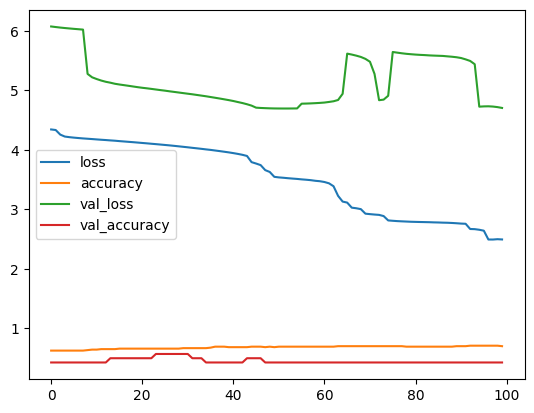

In [5]:
# if you create a dataframe using the history.history object you can easily plot the learning curves by using the plot method.
# Try it out

df = pd.DataFrame(history.history).plot()

# if you are not sure how to do it see the tutorial:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# Model usage

If you want to make predictions an the test set, simplu use the predict method.



```
predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```

The only argument you should care about is the x - your data


In [6]:
# make predictions on the test set

predictions = model.predict(X_test)
predictions # logits
# klasyfukuje na taka klase, na ktorej predykcja jest najsilniejsza,
# kaza z kolumn to jedna klasa - neuron

1/1 [==============================] - 0s 154ms/step


array([[-3.04337   ,  0.28848678,  0.45714125],
       [ 2.0323935 , -0.17484705, -1.15469   ],
       [-4.0203648 ,  0.6770626 ,  0.3116177 ],
       [-2.4495769 ,  0.37252533,  0.43183812],
       [ 2.1243176 , -0.5394298 , -1.0301987 ],
       [-1.029856  , -0.30028486,  0.29016337],
       [-0.71887153, -0.75901014,  0.5214366 ],
       [-1.2576743 , -0.36931303,  0.26647773],
       [-2.337594  , -0.19111171,  0.6362505 ],
       [-1.6823395 , -0.17538178,  0.20212433],
       [-3.62139   ,  0.4624954 ,  0.60731244],
       [-1.5773914 ,  0.47065234, -0.33561027],
       [ 1.2766597 ,  0.13245304, -1.0763266 ],
       [-0.73430866, -0.55809534,  0.14147267],
       [-0.8866415 ,  0.08641307, -0.30985153]], dtype=float32)

# Model evaluation

To evaluate your model, use the evaluate method. It will print the loss function value first and the metrics you passed to the model while compiling it.


```
evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)
```

Again, the only parameters you need to pass, and really care baout, are x and y






In [7]:
# evaluate your model using the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 51ms/step - loss: 2.1276 - accuracy: 0.8000


[2.1276326179504395, 0.800000011920929]